In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_excel("SP500_.xlsx",
                 sheet_name=0,
            index_col="Date",
            parse_dates=True)

df.head()

,Close
Date,
2020-06-19,3097.739990
2020-06-22,3117.860107
2020-06-23,3131.290039
2020-06-24,3050.330078
2020-06-25,3083.760010


In [104]:
df=pd.read_csv("datos_spy.csv",delimiter=";",decimal=",",dayfirst=True,index_col="Date")

df.head()

,Close
Date,
19/06/2020,3097.739990
22/06/2020,3117.860107
23/06/2020,3131.290039
24/06/2020,3050.330078
25/06/2020,3083.760010


<Axes: title={'center': 'Daily close'}, xlabel='Date'>

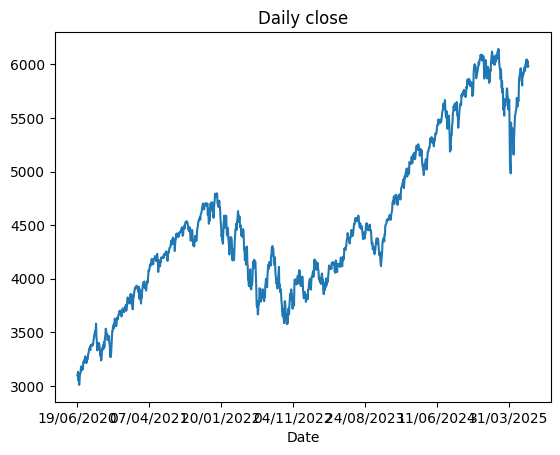

In [105]:
df["Close"].plot(title="Daily close")

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

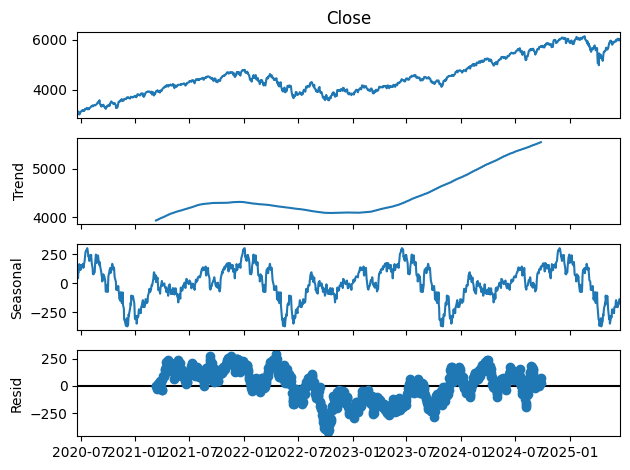

In [96]:
##Seasonal decomposotion
# 7/365 for daily data, 24/7/365 for hourly, 12 montly

sd=seasonal_decompose(df['Close'],model='additive',period=365).plot()


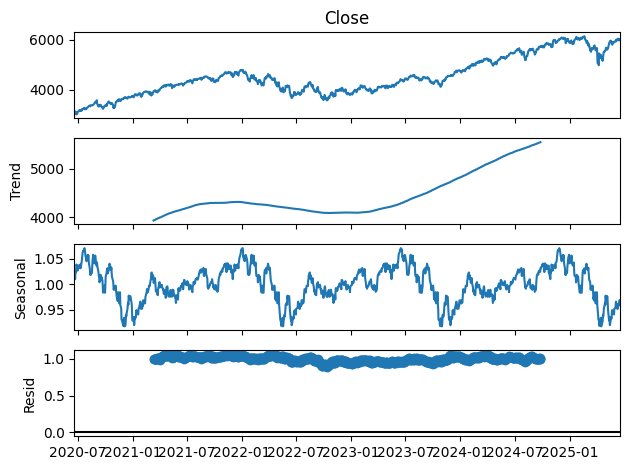

In [ ]:
sd=seasonal_decompose(df['Close'],model='multiplicative',period=365).plot()

In [24]:
! pip install pmdarima

  Using cached cython-3.1.2-cp38-cp38-macosx_11_0_arm64.whl.metadata (5.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 627.9/627.9 kB 7.5 MB/s eta 0:00:00
Using cached cython-3.1.2-cp38-cp38-macosx_11_0_arm64.whl (2.9 MB)


In [25]:
from pmdarima import auto_arima

In [106]:
#Split data into tranning 

test_days=31

train=df[:-test_days] #todas menos las ultimas 31
test=df[-test_days:] #las ultimas 31

In [107]:
#ARIMA model

arima_model=auto_arima(train['Close'],
                       seasonal=False)

print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1225
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -6507.803
Date:                Mon, 23 Jun 2025   AIC                          13019.606
Time:                        00:49:14   BIC                          13029.825
Sample:                             0   HQIC                         13023.452
                               - 1225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.0855      1.409      1.480      0.139      -0.676       4.847
sigma2      2430.3432     40.905     59.414      0.000    2350.171    2510.516
Ljung-Box (L1) (Q):                   1.01   Jarque-

In [108]:
#Predicting with the ARIMA model

test_prediction=arima_model.predict(n_periods=len(test))

test_prediction

/opt/anaconda3/envs/islp/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/islp/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


1225    5652.465373
1226    5654.550863
1227    5656.636353
1228    5658.721843
1229    5660.807334
1230    5662.892824
1231    5664.978314
1232    5667.063804
1233    5669.149294
1234    5671.234784
1235    5673.320274
1236    5675.405764
1237    5677.491254
1238    5679.576745
1239    5681.662235
1240    5683.747725
1241    5685.833215
1242    5687.918705
1243    5690.004195
1244    5692.089685
1245    5694.175175
1246    5696.260665
1247    5698.346155
1248    5700.431646
1249    5702.517136
1250    5704.602626
1251    5706.688116
1252    5708.773606
1253    5710.859096
1254    5712.944586
1255    5715.030076
dtype: float64

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error



In [52]:
mae=mean_absolute_error(test['Close'],test_prediction)
mape=mean_absolute_percentage_error(test['Close'],test_prediction) *100
rmse=mean_squared_error(test['Close'],test_prediction,squared=False)

print(f"Evaluation metrics: \nRMSE: {rmse:.0f} \nMAE: {mae:.0f} \nMAPE: {mape: .2f}%")

Evaluation metrics: 
RMSE: 242 
MAE: 224 
MAPE:  3.76%


### Lectura adicional para sistemas de produccion

https://aws.amazon.com/es/blogs/database/predictive-analytics-with-time-series-machine-learning-on-amazon-timestream/

Box-Jenkins methodology. SARIMA viene de esa metodologia?
# SARIMA

In [89]:
#SARIMA MODEL

sarima_model=auto_arima(train['Close'],
                        seasonal=True, 
                        m=7)

print(sarima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1225
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -6507.803
Date:                Mon, 23 Jun 2025   AIC                          13019.606
Time:                        00:42:29   BIC                          13029.825
Sample:                             0   HQIC                         13023.452
                               - 1225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.0855      1.409      1.480      0.139      -0.676       4.847
sigma2      2430.3432     40.905     59.414      0.000    2350.171    2510.516
Ljung-Box (L1) (Q):                   1.01   Jarque-

In [91]:
test_prediction=sarima_model.predict(n_periods=len(test))
test_prediction


/opt/anaconda3/envs/islp/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/islp/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


1225    5652.465373
1226    5654.550863
1227    5656.636353
1228    5658.721843
1229    5660.807333
1230    5662.892823
1231    5664.978314
1232    5667.063804
1233    5669.149294
1234    5671.234784
1235    5673.320274
1236    5675.405764
1237    5677.491254
1238    5679.576744
1239    5681.662234
1240    5683.747725
1241    5685.833215
1242    5687.918705
1243    5690.004195
1244    5692.089685
1245    5694.175175
1246    5696.260665
1247    5698.346155
1248    5700.431645
1249    5702.517136
1250    5704.602626
1251    5706.688116
1252    5708.773606
1253    5710.859096
1254    5712.944586
1255    5715.030076
dtype: float64

In [59]:
mae=mean_absolute_error(test['Close'],test_prediction)
mape=mean_absolute_percentage_error(test['Close'],test_prediction) *100
rmse=mean_squared_error(test['Close'],test_prediction,squared=False)

print(f"Evaluation metrics: \nRMSE: {rmse:.0f} \nMAE: {mae:.0f} \nMAPE: {mape: .2f}%")

Evaluation metrics: 
RMSE: 242 
MAE: 224 
MAPE:  3.76%


# SARIMAX

In [55]:
# Regressors

X_train=train.iloc[:,1:]
X_test=test.iloc[:,1:]


sarimax_model=auto_arima(train['Close'],
                        seasonal=True, 
                        m=7,
                        X=X_train)

print(sarimax_model.summary())


ValueError: at least one array or dtype is required

In [ ]:
test_prediction=sarimax_model.predict(n_periods=len(test),X=X_test)
test_prediction

In [60]:
mae=mean_absolute_error(test['Close'],test_prediction)
mape=mean_absolute_percentage_error(test['Close'],test_prediction) *100
rmse=mean_squared_error(test['Close'],test_prediction,squared=False)

print(f"Evaluation metrics: \nRMSE: {rmse:.0f} \nMAE: {mae:.0f} \nMAPE: {mape: .2f}%")

Evaluation metrics: 
RMSE: 242 
MAE: 224 
MAPE:  3.76%


# En este caso no hay variables regresoras, asi que el codigo siguiente no se ejcuta. 
# hay que conseguir un set e datos con variables por ejemplo open_perice y close price

In [66]:
future_df=pd.read_csv("predicciones_mes_siguiente.csv",sep=';',decimal=",",parse_dates=True, index_col="Date",dayfirst=True)

future_df.head()



,Close
Date,
2025-06-19,NaN
2025-06-20,NaN
2025-06-23,NaN
2025-06-24,NaN
2025-06-25,NaN


In [67]:
sarima_predict_model=auto_arima(df['Close'],seasonal=True,m=7)
sarima_predict_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1256
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -6674.849
Date:                Mon, 23 Jun 2025   AIC                          13353.698
Time:                        00:25:58   BIC                          13363.968
Sample:                             0   HQIC                         13357.558
                               - 1256                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.2973      1.394      1.648      0.099      -0.435       5.030
sigma2      2438.9743     40.904     59.627      0.000    2358.804    2519.145
===================================================================================
Ljung-Box (L1) (Q):                   1.17   Jarque-Bera (JB):              4555.97
Prob(Q):                              0.28   Prob(JB):                         0.00
Heteroskedasticity (H):               2.35   Skew:                             0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
forecast=sarima_predict_model.predict(n_periods=len(future_df),
                                             X=future_df.iloc[:,1:])

/opt/anaconda3/envs/islp/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/islp/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [87]:
forecast.head()

1256    5983.167432
1257    5985.464747
1258    5987.762062
1259    5990.059377
1260    5992.356691
dtype: float64

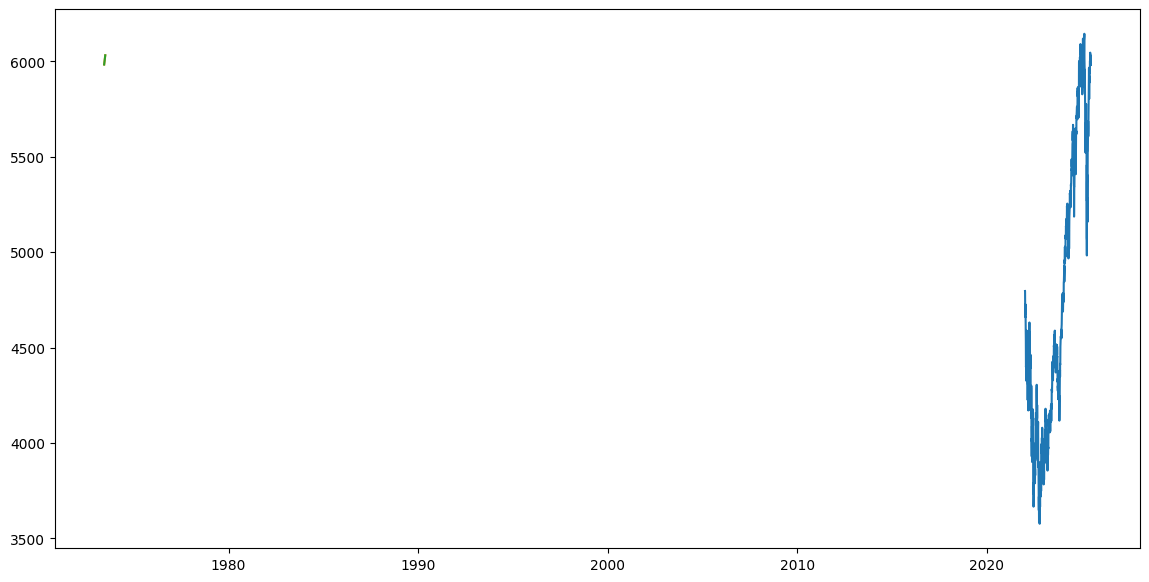

In [84]:
plt.figure(figsize=(14,7))
plt.plot(df["Close"]['2022':])
plt.plot(test_prediction)
plt.plot(forecast)

plt.show()
